In [1]:
import numpy as np
from dezero import *
import dezero.functions as F
import dezero.utils as dzutils
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
np.random.seed(0)

In [3]:
x = np.random.rand(100, 1)
print(x)

[[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]
 [0.64589411]
 [0.43758721]
 [0.891773  ]
 [0.96366276]
 [0.38344152]
 [0.79172504]
 [0.52889492]
 [0.56804456]
 [0.92559664]
 [0.07103606]
 [0.0871293 ]
 [0.0202184 ]
 [0.83261985]
 [0.77815675]
 [0.87001215]
 [0.97861834]
 [0.79915856]
 [0.46147936]
 [0.78052918]
 [0.11827443]
 [0.63992102]
 [0.14335329]
 [0.94466892]
 [0.52184832]
 [0.41466194]
 [0.26455561]
 [0.77423369]
 [0.45615033]
 [0.56843395]
 [0.0187898 ]
 [0.6176355 ]
 [0.61209572]
 [0.616934  ]
 [0.94374808]
 [0.6818203 ]
 [0.3595079 ]
 [0.43703195]
 [0.6976312 ]
 [0.06022547]
 [0.66676672]
 [0.67063787]
 [0.21038256]
 [0.1289263 ]
 [0.31542835]
 [0.36371077]
 [0.57019677]
 [0.43860151]
 [0.98837384]
 [0.10204481]
 [0.20887676]
 [0.16130952]
 [0.65310833]
 [0.2532916 ]
 [0.46631077]
 [0.24442559]
 [0.15896958]
 [0.11037514]
 [0.65632959]
 [0.13818295]
 [0.19658236]
 [0.36872517]
 [0.82099323]
 [0.09710128]
 [0.83794491]
 [0.09609841]
 [0.97645947]
 [0.46

In [4]:
y = 5 + 2 * x + np.random.randn(100, 1) / 3.0

In [5]:
y

array([[5.70924373],
       [6.73065423],
       [6.36074757],
       [5.57768514],
       [6.34339366],
       [6.92375128],
       [6.26810095],
       [6.72357106],
       [6.57040798],
       [6.11836695],
       [6.44905776],
       [6.46527153],
       [6.20551411],
       [7.17673962],
       [5.26086092],
       [5.40978299],
       [5.0439368 ],
       [7.26052986],
       [6.59861753],
       [6.87402075],
       [7.58495358],
       [6.14906411],
       [5.49946373],
       [6.88419059],
       [4.84550772],
       [6.92771577],
       [5.14883358],
       [6.64018623],
       [6.68467732],
       [6.32282881],
       [6.15163088],
       [6.85048226],
       [5.62522544],
       [6.77355622],
       [4.94824514],
       [6.50275646],
       [6.5399421 ],
       [6.18219796],
       [7.09218928],
       [6.67104282],
       [5.84449098],
       [5.50759698],
       [6.49467512],
       [5.56257958],
       [6.10201081],
       [6.29139756],
       [5.27571394],
       [5.874

In [6]:
y.shape

(100, 1)

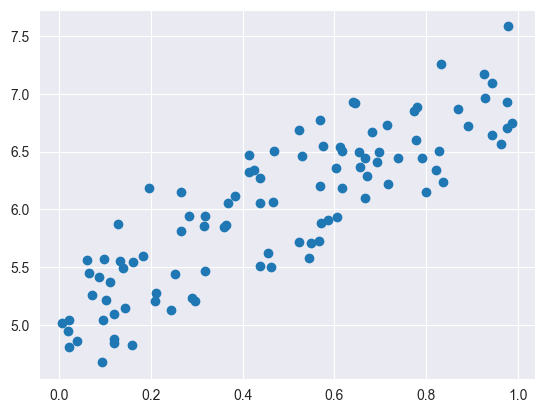

In [7]:
plt.scatter(x, y)

In [8]:
y.shape

(100, 1)

In [9]:
x, y = Variable(x), Variable(y)

In [10]:
W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

In [11]:
def predict(x):
    y = F.matmul(x, W) + b
    return y

In [12]:
lr = 0.1
iters = 100
loss_trace = []

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y_pred, y)
    
    W.cleargrad()
    b.cleargrad()
    loss.backward()
    
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    loss_trace.append(loss.data)
    print(W, b, loss)

variable([[0.15029185]]) variable([0.30048496]) variable(36.55227345339904)
variable([[0.29117597]]) variable([0.58239281]) variable(32.1770403451791)
variable([[0.42323576]]) variable([0.84687482]) variable(28.327339241059413)
variable([[0.54701845]]) variable([1.09501087]) variable(24.940044146311994)
variable([[0.66303737]]) variable([1.32781393]) variable(21.959611662229335)
variable([[0.77177404]]) variable([1.5462342]) variable(19.337170176445856)
variable([[0.87368009]]) variable([1.75116294]) variable(17.029718458306245)
variable([[0.96917921]]) variable([1.94343622]) variable(14.999420517716251)
variable([[1.05866881]]) variable([2.12383827]) variable(13.212985164455485)
variable([[1.14252164]]) variable([2.29310471]) variable(11.641120093863973)
variable([[1.22108739]]) variable([2.45192557]) variable(10.258051546910055)
variable([[1.29469404]]) variable([2.60094812]) variable(9.04110166794642)
variable([[1.36364927]]) variable([2.7407795]) variable(7.970316629597518)
variabl

In [13]:
[x.grad for x in loss.creator.inputs]

[None,
 variable([[0.26383651]
           [0.60938508]
           [0.53603389]
           [0.20195873]
           [0.70515302]
           [0.77472107]
           [0.65367635]
           [0.43055385]
           [0.28260936]
           [0.63255827]
           [0.39261202]
           [0.66162303]
           [0.49288157]
           [0.62356235]
           [0.51392143]
           [0.57240716]
           [0.45590465]
           [0.75775294]
           [0.48086077]
           [0.52738009]
           [0.77503617]
           [0.23523614]
           [0.24564067]
           [0.62129226]
           [0.25935262]
           [0.78263264]
           [0.38612047]
           [0.33635314]
           [0.77832088]
           [0.70379756]
           [0.76720495]
           [0.61068745]
           [0.3138115 ]
           [0.77651608]
           [0.40947695]
           [0.5922752 ]
           [0.6163672 ]
           [0.43269231]
           [0.56326876]
           [0.61270392]
           [0.51937852]
         

In [14]:
[x.grad for x in loss.creator.inputs[0].creator.inputs][:10]

[None, variable([-0.01106029])]

In [15]:
W.grad.data, b.grad.data

(array([[0.00863866]]), array([-0.01106029]))

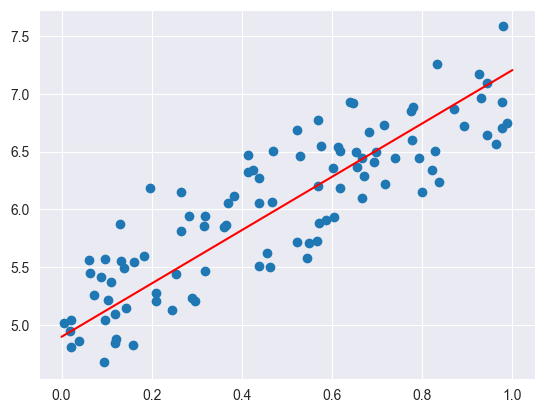

In [16]:
plt.scatter(x.data, y.data)
x2 = np.linspace(0, 1, 1000).reshape(-1, 1)
plt.plot(x2, x2 * W.data + b.data, color='red')

Text(0, 0.5, 'loss')

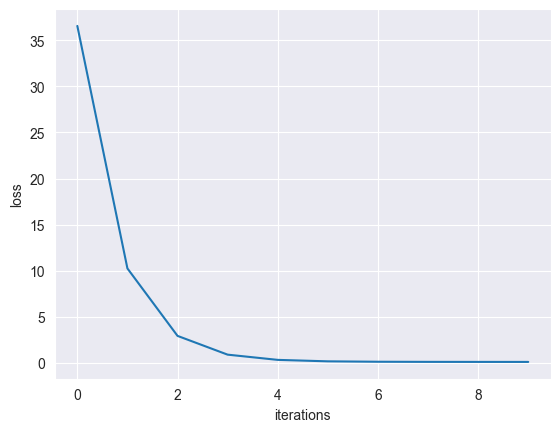

In [20]:
loss_trace2 = [loss_trace[i] for i in range(len(loss_trace)) if i % 10 == 0]
plt.plot(loss_trace2)
plt.xlabel('iterations')
plt.ylabel('loss')

In [18]:
loss_trace2

[array(36.55227345),
 array(10.25805155),
 array(2.94413702),
 array(0.90919769),
 array(0.34252891),
 array(0.18427021),
 array(0.13964355),
 array(0.12666061),
 array(0.12251573),
 array(0.12086363)]

In [19]:

a = Variable(np.array([3.0, 4.0, 5.0]))
b = Variable(np.array([2.0, 3.0, 4.0]))

F.mean_squared_error(a, b)

variable(1.0)